In [1]:
#points

In [2]:
from volumetricspy.stats import Dot,CloudPoints, Spherical
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import Voronoi, voronoi_plot_2d


In [3]:
p1 = Dot(x=50,y=40, fields={'facies':'sand'})
p2 = Dot(x=20,y=90, fields={'facies':'coal'})
p3 = Dot(x=60,y=70, fields={'facies':'shale'})
p = CloudPoints(points = [p1,p2,p3])
p.one_hot_encode('facies')
print(p.df())

      x     y     z   crs facies  coal  sand  shale
0  50.0  40.0  None  None   sand     0     1      0
1  20.0  90.0  None  None   coal     1     0      0
2  60.0  70.0  None  None  shale     0     0      1


In [4]:
up1 = Dot(x=70,y=27)
up = CloudPoints(points = [up1])
up.df()

,x,y,z,crs
0,70.0,27.0,None,None


<AxesSubplot:>

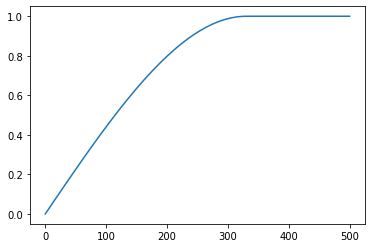

In [5]:
s1 = Spherical(
    sill = 1.,
    range = 330,
    nuggets = 0.
)

s1.plot(np.linspace(0,500,50))

In [6]:
p.df()

,x,y,z,crs,facies,coal,sand,shale
0,50.0,40.0,None,None,sand,0,1,0
1,20.0,90.0,None,None,coal,1,0,0
2,60.0,70.0,None,None,shale,0,0,1


In [9]:
up1= s1.ordinary_kriging(p, up, 'coal')
up2=s1.ordinary_kriging(p, up1, 'sand')
up3=s1.ordinary_kriging(p, up2, 'shale')

In [12]:
up3.df()

,x,y,z,crs,coal,coal_variance,sand,sand_variance,shale,shale_variance
0,70.0,27.0,None,None,-0.065282,0.205397,0.837256,0.205397,0.228025,0.205397


In [14]:
up3.df()[['coal','shale','sand']].sum(axis=1)

0    1.0
dtype: float64

<AxesSubplot:xlabel='x', ylabel='y'>

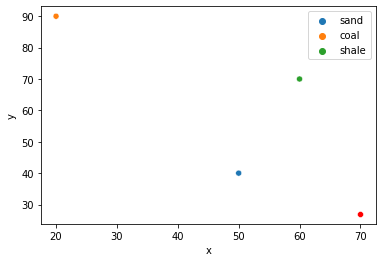

In [15]:
p.plot(hue='facies')
up3.plot(color='red')

In [16]:
#df = pd.read_csv('sample_data_biased.csv')     # load our data table
df = pd.read_csv('https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/sample_data_biased.csv')
df['Facies'] = df['Facies'].map({0:'sand',1:'shale'})
df

,X,Y,Facies,Porosity,Perm
0,100,900,shale,0.115359,5.736104
1,100,800,shale,0.136425,17.211462
2,100,600,shale,0.135810,43.724752
3,100,500,sand,0.094414,1.609942
4,100,100,sand,0.113049,10.886001
...,...,...,...,...,...
284,190,199,shale,0.109411,3.247265
285,190,419,sand,0.099541,1.528003
286,920,379,sand,0.094099,2.514597
287,60,149,sand,0.100167,3.636854


In [17]:
cp = CloudPoints().from_df(df, x='X',y='Y', fields=['Facies','Porosity','Perm'])
cp.df()

,x,y,z,crs,Facies,Porosity,Perm
0,100.0,900.0,None,None,shale,0.115359,5.736104
1,100.0,800.0,None,None,shale,0.136425,17.211462
2,100.0,600.0,None,None,shale,0.135810,43.724752
3,100.0,500.0,None,None,sand,0.094414,1.609942
4,100.0,100.0,None,None,sand,0.113049,10.886001
...,...,...,...,...,...,...,...
284,190.0,199.0,None,None,shale,0.109411,3.247265
285,190.0,419.0,None,None,sand,0.099541,1.528003
286,920.0,379.0,None,None,sand,0.094099,2.514597
287,60.0,149.0,None,None,sand,0.100167,3.636854


In [18]:
cp.one_hot_encode('Facies').df()

,x,y,z,crs,Facies,Porosity,Perm,sand,shale
0,100.0,900.0,None,None,shale,0.115359,5.736104,0,1
1,100.0,800.0,None,None,shale,0.136425,17.211462,0,1
2,100.0,600.0,None,None,shale,0.135810,43.724752,0,1
3,100.0,500.0,None,None,sand,0.094414,1.609942,1,0
4,100.0,100.0,None,None,sand,0.113049,10.886001,1,0
...,...,...,...,...,...,...,...,...,...
284,190.0,199.0,None,None,shale,0.109411,3.247265,0,1
285,190.0,419.0,None,None,sand,0.099541,1.528003,1,0
286,920.0,379.0,None,None,sand,0.094099,2.514597,1,0
287,60.0,149.0,None,None,sand,0.100167,3.636854,1,0


<AxesSubplot:xlabel='x', ylabel='y'>

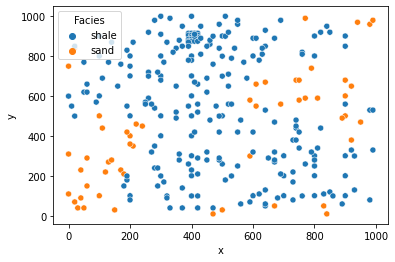

In [19]:
cp.plot(hue='Facies')

<AxesSubplot:>

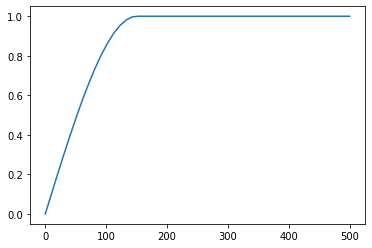

In [20]:
s2 = Spherical(
    sill = 1.,
    range = 150,
    nuggets = 0.
)

s2.plot(np.linspace(0,500,50))

In [21]:
xn = np.linspace(0,1000,50)
yn = np.linspace(0,1000,50)

xx, yy = np.meshgrid(xn, yn)

dfun = pd.DataFrame({"x":xx.flatten(order='F'),"y":yy.flatten(order='F')})
grid = CloudPoints().from_df(dfun, x='x',y='y')

In [22]:
wm1 = s2.ordinary_kriging(cp,grid,v='shale')
print('--')
wm2 = s2.ordinary_kriging(cp,wm1,v='sand')

--


In [23]:
pred = wm2.df()[['sand','shale']].idxmax(axis=1).to_frame()
pred.columns=['pred']
pred

,pred
0,sand
1,sand
2,sand
3,sand
4,sand
...,...
2495,sand
2496,sand
2497,sand
2498,sand


In [24]:
wm2.add_fields_from_df(pred, ['pred'])
wm2.df()

,x,y,z,crs,shale,shale_variance,sand,sand_variance,pred
0,0.0,0.000000,None,None,0.428006,0.706652,0.571994,0.706652,sand
1,0.0,20.408163,None,None,0.309545,0.550432,0.690455,0.550432,sand
2,0.0,40.816327,None,None,0.197713,0.422455,0.802287,0.422455,sand
3,0.0,61.224490,None,None,0.120137,0.330105,0.879863,0.330105,sand
4,0.0,81.632653,None,None,0.070710,0.279478,0.929290,0.279478,sand
...,...,...,...,...,...,...,...,...,...
2495,1000.0,918.367347,None,None,0.375504,0.677546,0.624496,0.677546,sand
2496,1000.0,938.775510,None,None,0.229328,0.473992,0.770672,0.473992,sand
2497,1000.0,959.183673,None,None,0.114166,0.288207,0.885834,0.288207,sand
2498,1000.0,979.591837,None,None,0.083206,0.186104,0.916794,0.186104,sand


<AxesSubplot:xlabel='x', ylabel='y'>

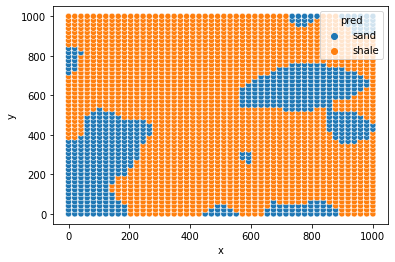

In [25]:
wm2.plot(hue='pred')

<AxesSubplot:xlabel='x', ylabel='y'>

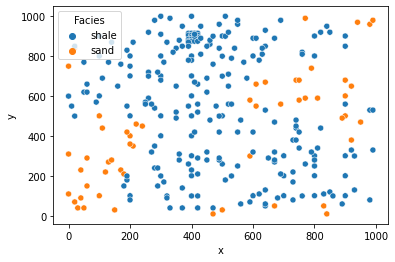

In [26]:
cp.plot(hue='Facies')